In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import fibsem
from fibsem.imaging import masks
from fibsem.imaging import utils
from autoscript_sdb_microscope_client.structures import AdornedImage
from PIL import Image

import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.segmentation import watershed
from skimage.feature import peak_local_max

from skimage import data
from skimage import filters
from skimage.color import rgb2gray

import imageio
import cv2



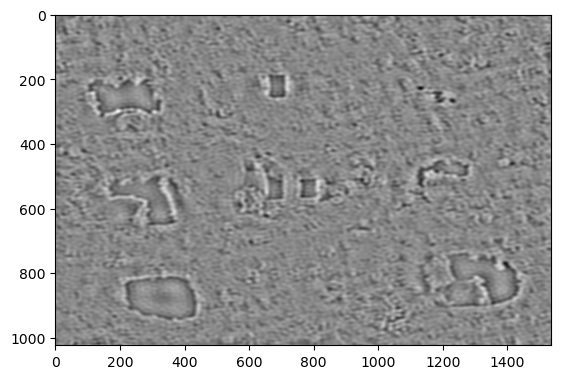

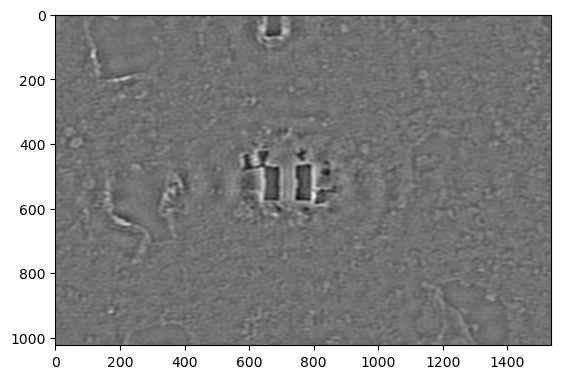

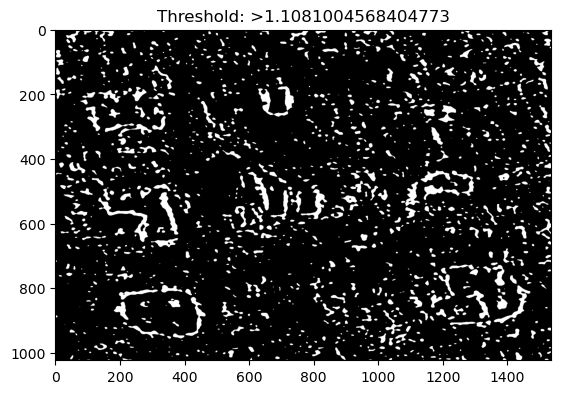

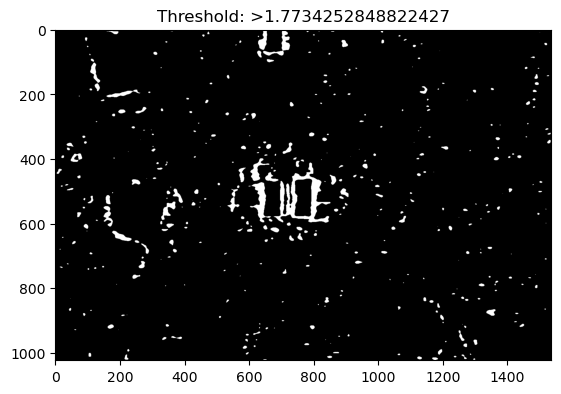

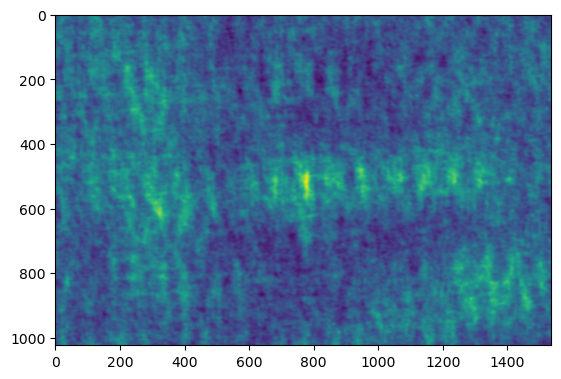

In [39]:
img4 = mpimg.imread("C:/Users/phipo/Documents/GitHub/PIE scope/test/20220202.161324/01_eb_drift_correction_lamella_low_res_0_eb.tif")
img5 = mpimg.imread("C:/Users/phipo/Documents/GitHub/PIE scope/test/20220202.161324/01_eb_drift_correction_lamella_low_res_0_ib.tif")

img4 = AdornedImage(img4, None)
img5 = AdornedImage(img5, None)
#img4 = AdornedImage(np.roll(img4, shift=(400, 400), axis=(0, 1)))
pixelsize_img4 = img4.data.shape
pixelsize_img5 = img5.data.shape
img4_mask = masks.create_bandpass_mask(pixelsize_img4, 100, 4, 3)
img5_mask = masks.create_bandpass_mask(pixelsize_img5, 100, 4, 3)

img4fft = np.fft.ifftshift(img4_mask * np.fft.fftshift(np.fft.fft2(img4.data)))
img5fft = np.fft.ifftshift(img5_mask * np.fft.fftshift(np.fft.fft2(img5.data)))

n_pixels = img4.data.shape[0] * img4.data.shape[1]
img4fft[0, 0] = 0
tmp = img4fft * np. conj(img4fft)
img4fft = n_pixels * img4fft / np.sqrt(tmp.sum())

n_pixels = img5.data.shape[0] * img5.data.shape[1]
img5fft[0, 0] = 0
tmp = img5fft * np. conj(img5fft)
img5fft = n_pixels * img5fft / np.sqrt(tmp.sum())

filtered1 = np.fft.fftshift(np.fft.ifftshift(np.fft.ifft2(img4fft)))
plt.imshow(np.real(filtered1), cmap='gray')
plt.show()
filtered2 = np.fft.fftshift(np.fft.ifftshift(np.fft.ifft2(img5fft)))
plt.imshow(np.real(filtered2.data), cmap='gray')
plt.show()

otsu1 = filters.threshold_otsu(np.abs(filtered1))
otsu2 = filters.threshold_otsu(np.abs(filtered2))

binary1 = (filtered1 > otsu1)*1
plt.title("Threshold: >"+str(otsu1))
plt.imshow(binary1, cmap='gray')
plt.show()

binary2 = (filtered2 > otsu2)*1
plt.title("Threshold: >"+str(otsu2))
plt.imshow(binary2, cmap='gray')
plt.show()

fft1 = np.fft.ifftshift(np.fft.fftshift(np.fft.fft2(binary1)))
fft2 = np.fft.ifftshift(np.fft.fftshift(np.fft.fft2(binary2)))


xcorr = np.real(np.fft.fftshift(np.fft.ifft2(fft1 * np.conj(fft2))))
plt.imshow(xcorr)
plt.show()





In [40]:
np.amax(xcorr)

9249.0